In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import log_loss, classification_report

""" connects to inline backend """
%matplotlib inline
""" set seed for stable execution """
np.random.seed(42)

In [6]:
"""load dataset """
df = pd.read_csv("features4_5m_all.csv", header = 0, delimiter = ",")
df.head()

,TimeStamp_x,ALM_Ai_Mainau1CleaningAirPress_B12591_PDP_x,ALM_Ai_Mainau2CleaningAirPress_B12593_PDP_x,ALM_Ao_Mainau1_HDVacValveSetpoint_A12625_PDP_x,ALM_Ao_Mainau2_HDVacValveSetpoint_A12627_PDP_x,ALM_HMI_O_Mainau1_Runtime_PDP_x,ALM_HMI_O_Mainau2_Runtime_PDP_x,ALM_Mainau1_BOffAirPress_Scale_PDP_x,ALM_Mainau1_FillVac_Scale_PDP_x,ALM_Mainau1_FillVacValveFeed_Scale_PDP_x,...,ALM_Mainau1_FillVac_Scale_PDP_y.1,ALM_Mainau1_FillVacValveFeed_Scale_PDP_y.1,ALM_Mainau1_HDownVac_Scale_PDP_y.1,ALM_Mainau1_HDVacValveFeed_Scale_PDP_y.1,ALM_Mainau2_BOffAirPress_Scale_PDP_y.1,ALM_Mainau2_FillVac_Scale_PDP_y.1,ALM_Mainau2_FillVacValveFeed_Scale_PDP_y.1,ALM_Mainau2_HDownVac_Scale_PDP_y.1,ALM_Mainau2_HDVacValveFeed_Scale_PDP_y.1,Label
0,2018-09-21 14:15:00,-0.254545,-0.254545,1.072727,1.072727,-0.7,-0.7,0.0,0.0,20.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2018-09-21 14:20:00,-0.081967,-0.081967,1.081967,1.081967,-0.7,-0.7,0.0,0.0,20.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2018-09-21 16:05:00,-0.288136,-0.288136,1.237288,1.237288,-0.7,-0.7,0.0,0.0,19.508475,...,0.0,0.504219,0.504219,0.504219,0.504219,0.504219,0.504219,0.504219,0.504219,0.0
3,2018-09-21 16:10:00,-0.416667,-0.416667,1.183333,1.183333,-0.7,-0.7,0.0,0.0,19.316667,...,0.0,0.469102,0.469102,0.469102,0.469102,0.469102,0.469102,0.469102,0.469102,0.0
4,2018-09-21 16:15:00,-0.316667,-0.316667,1.083333,1.083333,-0.7,-0.7,0.0,0.0,19.400000,...,0.0,0.494032,0.494032,0.494032,0.494032,0.494032,0.494032,0.494032,0.494032,0.0


In [7]:
""" prepare train, test samples """

df.drop("TimeStamp_x", axis = 1, inplace = True)
size_train = 0.8
train = df.iloc[0:int(df.shape[0]*size_train):]
test = df.iloc[int(df.shape[0]*size_train)::]

X_train = train.loc[:,:'ALM_Mainau2_HDVacValveFeed_Scale_PDP_y.1'].values
y_train = train['Label'].values
X_test = test.loc[:,:'ALM_Mainau2_HDVacValveFeed_Scale_PDP_y.1'].values
y_test = test['Label'].values

In [8]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_f = X_train.shape[1]

print ("- Number of training examples: m_train = " + str(m_train))
print ("- Number of testing examples: m_test = " + str(m_test))
print ("- Number of features: num_f = " + str(num_f))
print ("- X_train shape: " + str(X_train.shape))
print ("- y_train shape: " + str(y_train.shape))
print ("- X_test shape: " + str(X_test.shape))
print ("- y_test shape: " + str(y_test.shape))

""" adjust shapes """
print("\nCorrected Data Format")
x_train = X_train.reshape(X_train.shape[0], -1).T
x_test = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape(y_train.shape[0], -1).T
y_test = y_test.reshape(y_test.shape[0], -1).T

print ("- x_train shape: " + str(x_train.shape))
print ("- y_train shape: " + str(y_train.shape))
print ("- x_test shape: " + str(x_test.shape))
print ("- y_test shape: " + str(y_test.shape))

- Number of training examples: m_train = 68244
- Number of testing examples: m_test = 17061
- Number of features: num_f = 64
- X_train shape: (68244, 64)
- y_train shape: (68244,)
- X_test shape: (17061, 64)
- y_test shape: (17061,)

Corrected Data Format
- x_train shape: (64, 68244)
- y_train shape: (1, 68244)
- x_test shape: (64, 17061)
- y_test shape: (1, 17061)


In [9]:
""" standardize the dataset """
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [10]:
""" z = w*x + b """
def sigmoid(z):
    return (1/(1+np.exp(-z)))

""" sample sigmoid test """
print ("sigmoid([6, 7]) = " + str(sigmoid(np.array([6, 7]))))

sigmoid([6, 7]) = [0.99752738 0.99908895]


In [11]:
""" initialize weights and bias """
def init_weights_bias(dim):
    b = 0
    w = np.zeros((dim, 1))
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

""" sample init test """
dim = 2
w,b = init_weights_bias(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    """ bias broadcast """
    param = np.dot(w.T,X) + b
    A = sigmoid(param)             
    cost = np.sum(np.log(A)*Y + np.log(1-A)*(1-Y)) / (-m)
    """ gradient formulas """
    dw = np.dot(X,(A-Y).T) / m
    db = np.sum(A-Y) / m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    return grads,cost

""" sample propagation """
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-dw*learning_rate
        b = b-db*learning_rate
        """ keep track of costs """
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print (f"Cost after iteration {i}: {cost}")
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

""" sample optimization """
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [14]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 0 if A[0,i] <= 0.5 else 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

""" sample prediction """
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [15]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = init_weights_bias(x_train.shape[0])
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost = True)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, x_test)
    Y_prediction_train = predict(w, b, x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    info = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return info

In [16]:
info = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.12976855231327444
Cost after iteration 200: 0.11277805343784524
Cost after iteration 300: 0.10613629365139156
Cost after iteration 400: 0.10237465932081521
Cost after iteration 500: 0.09989761376793174
Cost after iteration 600: 0.09812254736396872
Cost after iteration 700: 0.09677886231933393
Cost after iteration 800: 0.09572168722472506
Cost after iteration 900: 0.09486561699850338
Cost after iteration 1000: 0.09415666824289824
Cost after iteration 1100: 0.09355888207396076
Cost after iteration 1200: 0.09304730951824303
Cost after iteration 1300: 0.09260406482052014
Cost after iteration 1400: 0.09221597431231998
Cost after iteration 1500: 0.09187311011605681
Cost after iteration 1600: 0.09156784093337306
Cost after iteration 1700: 0.09129419825121722
Cost after iteration 1800: 0.09104744189803411
Cost after iteration 1900: 0.0908237554060968
train accuracy: 97.91776566438075 %
test accuracy: 91.0380399742102 %


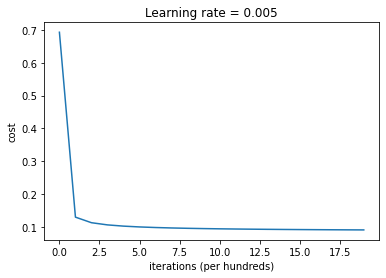

In [17]:
""" plotting learning curve (with costs) """
costs = np.squeeze(info['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(info["learning_rate"]))
plt.show()

learning rate is: 0.01
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.11269940035742444
Cost after iteration 200: 0.10235357011507834
Cost after iteration 300: 0.09811104281064854
Cost after iteration 400: 0.09571393747828075
Cost after iteration 500: 0.0941510105848864
Cost after iteration 600: 0.09304299283375057
Cost after iteration 700: 0.09221257913143271
Cost after iteration 800: 0.09156510863169841
Cost after iteration 900: 0.09104520332055825
Cost after iteration 1000: 0.090618167659115
Cost after iteration 1100: 0.09026106199691095
Cost after iteration 1200: 0.08995804690403711
Cost after iteration 1300: 0.08969778985786683
Cost after iteration 1400: 0.08947194041323131
train accuracy: 97.96026024265869 %
test accuracy: 91.0380399742102 %

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.25012716529005674
Cost after iteration 200: 0.17759043553176176
C

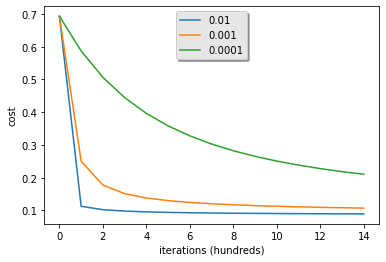

In [18]:
learning_rates = [0.01, 0.001, 0.0001]
""" find the learning rate that minimizes the loss function the best """
least_cost_lr = 42
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(x_train, y_train, x_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    if models[str(i)]["costs"][-1] < least_cost_lr:
        least_cost_lr = models[str(i)]["learning_rate"]
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [19]:
""" overwrite with best learning rate """
print("Learning rate that best minimizes the loss function is {learning_rate}".format(learning_rate = least_cost_lr))
print ("-------------------------------------------------------")
info = model(x_train, y_train, x_test, y_test, num_iterations = 1500, learning_rate = least_cost_lr, print_cost = True)

Learning rate that best minimizes the loss function is 0.01
-------------------------------------------------------
Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.11269940035742444
Cost after iteration 200: 0.10235357011507834
Cost after iteration 300: 0.09811104281064854
Cost after iteration 400: 0.09571393747828075
Cost after iteration 500: 0.0941510105848864
Cost after iteration 600: 0.09304299283375057
Cost after iteration 700: 0.09221257913143271
Cost after iteration 800: 0.09156510863169841
Cost after iteration 900: 0.09104520332055825
Cost after iteration 1000: 0.090618167659115
Cost after iteration 1100: 0.09026106199691095
Cost after iteration 1200: 0.08995804690403711
Cost after iteration 1300: 0.08969778985786683
Cost after iteration 1400: 0.08947194041323131
train accuracy: 97.96026024265869 %
test accuracy: 91.0380399742102 %


In [20]:
""" measure log_loss from sklearn module """
train_log_loss = log_loss(y_train, info["Y_prediction_train"], eps=1e-15) / x_train.shape[1]
print("Log training loss is: {l}".format(l = train_log_loss))
print ("-------------------------------------------------------")
test_log_loss = log_loss(y_test, info["Y_prediction_test"], eps=1e-15) / x_test.shape[1]
print("Log testing loss is: {l}".format(l = test_log_loss))

Log training loss is: 0.7321574460516457
-------------------------------------------------------
Log testing loss is: 0.8733027147649984


In [67]:
""" display value counts for each class"""
fun = np.random.randint(low = 0, high = 2, size = 1)
# class counts with Index, ravel()
if fun:
    print("Value Counts with Index, ravel()")
    print("--------------------------------------")
    pd.Index(y_test.ravel()).value_counts()
else:
    # class counts with Series, np.squeeze()
    print("Value Counts with Series, np.squeeze()")
    print("--------------------------------------")
    pd.Series(np.squeeze(y_test)).value_counts()

Value Counts with Index, ravel()
--------------------------------------


In [68]:
""" report the classification """
print(classification_report(y_true = np.squeeze(y_test), 
                            y_pred = np.squeeze(info["Y_prediction_test"]), 
                            labels = [1,0], target_names = ["Abnormal", "Normal"], zero_division = 1))

              precision    recall  f1-score   support

    Abnormal       1.00      0.00      0.00      1529
      Normal       0.91      1.00      0.95     15532

    accuracy                           0.91     17061
   macro avg       0.96      0.50      0.48     17061
weighted avg       0.92      0.91      0.87     17061

